In [53]:
import numpy as np
#import sys
#sys.path.append("../")
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import datetime
import copy

# Loading data

In [2]:
data = pd.read_csv("../dataset/parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
c = 0
for i in data.columns:
    print c, i 
    c+=1

0 name
1 MDVP:Fo(Hz)
2 MDVP:Fhi(Hz)
3 MDVP:Flo(Hz)
4 MDVP:Jitter(%)
5 MDVP:Jitter(Abs)
6 MDVP:RAP
7 MDVP:PPQ
8 Jitter:DDP
9 MDVP:Shimmer
10 MDVP:Shimmer(dB)
11 Shimmer:APQ3
12 Shimmer:APQ5
13 MDVP:APQ
14 Shimmer:DDA
15 NHR
16 HNR
17 status
18 RPDE
19 DFA
20 spread1
21 spread2
22 D2
23 PPE


In [4]:
print "total PD", data.status.values.tolist().count(1)
print "total no PD", data.status.values.tolist().count(0)
# as the number of PD and no PD is hugely different, resampling to get even amounts
pd_index = data.index[data.loc[:, "status"]==1]
nopd_index = data.index[data.loc[:, "status"]==0]
print pd_index.shape
print nopd_index.shape
#making data more even
my_index = np.hstack((pd_index[:48], nopd_index))
print my_index.shape

total PD 147
total no PD 48
(147,)
(48,)
(96,)


In [67]:



#X = scale(data.values[:, 1:].astype(np.float64)) #data[data.columns[[1, 2, 3]]].values

#y = data.status.values.astype(np.float64)#.reshape(-1,1)

################################################################################################
p_X = scale(data.values[my_index, 1:].astype(np.float64)) #data[data.columns[[1, 2, 3]]].values
y = data.status.values.astype(np.float64)[my_index]#.reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(p_X)
X = scaler.transform(p_X)
print X.shape, y.shape

(96, 23) (96,)


(57, 4) (19, 4) (20, 4)
(57,) (19,) (20,)


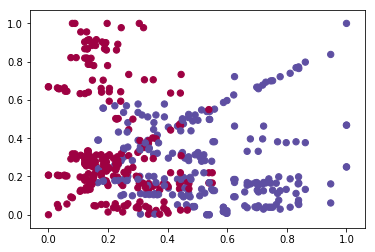

In [185]:
#20% for test, 20% for validating and 60% for training 
##seeding

np.random.seed(2)#0
X_data = X[:, [22, 19, 0, 1]] #X[:, [22, 21, 20, 19]]  #X[:, [0,1,2]] 
myray = np.arange(X_data.shape[0])
np.random.shuffle(myray)


X_train = X_data[myray[:int(0.6*X_data.shape[0])],:]
X_test = X_data[myray[int(0.6*X_data.shape[0]):int(0.8*X_data.shape[0])],:]
X_validation = X_data[myray[int(0.8*X_data.shape[0]):],:]


y_train = y[myray[:int(0.6*X.shape[0])]]
y_test = y[myray[int(0.6*X.shape[0]):int(0.8*X.shape[0])]]
y_validation = y[myray[int(0.8*X.shape[0]):]]

print X_train.shape, X_test.shape, X_validation.shape
print y_train.shape, y_test.shape, y_validation.shape

plt.scatter(X_data[:,0], X_data[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,0], X_data[:,2], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,0], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,0], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral)

plt.scatter(X_data[:,1], X_data[:,2], s=40, c=y, cmap=plt.cm.Spectral)
plt.scatter(X_data[:,1], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,1], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral) 

#plt.scatter(X_data[:,2], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)
#plt.scatter(X_data[:,2], X_data[:,4], s=40, c=y, cmap=plt.cm.Spectral)

#plt.scatter(X_data[:,4], X_data[:,3], s=40, c=y, cmap=plt.cm.Spectral)

plt.show()

## Joint Model

In [186]:
class joint:
    def __init__(self, function="SVM"): #could be SVM, MLP, RandomForest, NaiveBayes
        self.svc = SVC(C=2., kernel="rbf", degree=3, gamma="auto", 
            coef0=0.0, shrinking=True, probability=False, 
            tol=1e-5, cache_size=200, class_weight=None, 
            verbose=False, max_iter=-1, decision_function_shape="ovr", 
            random_state=None)  
        
        self.mlp = MLPClassifier(activation='tanh', max_iter=10000, hidden_layer_sizes=(12))
        
        self.rForest  = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None, 
            min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features="auto", 
            max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, bootstrap=True, oob_score=False,
            n_jobs=1, random_state=None, verbose=0, warm_start=False, 
            class_weight=None)
       
        self.nBayes = GaussianNB()
        
        #defining the final classifier     
        if function=="SVM":
            self.clf = copy.copy(self.svc)
        elif function=="MLP":
            self.clf = copy.copy(self.mlp)
        elif function=="RandomForest":
            self.clf = copy.copy(self.rForest)
        elif function=="NaiveBayes":
            self.clf = copy.copy(self.nBayes)
        else:
            print "Classifier not defined!!"
        self.report_data = None
    
    def fit(self, X, y):
        #pre train
        self.svc.fit(X, y)
        self.mlp.fit(X, y)
        self.rForest.fit(X, y)
        self.nBayes.fit(X, y)
        
        #jointing data
        X_n = np.vstack(( self.svc.predict(X), self.mlp.predict(X),
            self.rForest.predict(X), self.nBayes.predict(X)   )).T
        #training the final model
        self.clf.fit(X_n, y)
        
        
    def predict(self, X):
        X_n = np.vstack(( self.svc.predict(X), self.mlp.predict(X),
            self.rForest.predict(X), self.nBayes.predict(X)   )).T
        #the final model
        
        result = self.clf.predict(X_n)
        
        self.report_data = pd.DataFrame(np.hstack((X_n, result.reshape(-1,1))), columns=
            ["SVM", "MLP", "Random Forest", "Naive Bayes", "Joint Model"], dtype=np.int64)
        return result
        
    def score(self, X, y):
        X_n = np.vstack(( self.svc.predict(X), self.mlp.predict(X),
            self.rForest.predict(X), self.nBayes.predict(X) )).T
        return self.clf.score(X_n, y)
    
    
    def _plot_confusion_matrix(self, y_test, y_pred): 
        cnf_matrix = confusion_matrix(y_test, y_pred)
        classes = np.array(["No Parkinson", "Parkinson"])
        plt.clf()
        plt.close("all")
        plt.figure(figsize = (18,9))
        plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Normalized confusion matrix(Joint Classifier)')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        #normalized
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        thresh = cnf_matrix.max() / 2.
        for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, round(cnf_matrix[i, j], 3),
                horizontalalignment="center",
                color="white" if cnf_matrix[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Expected label')
        plt.xlabel('Predicted label')
        plt.show()

    
    
    
    
    def report(self, X, y):
        
        print "\n######### REPORT #########\n"
        print "Score: ", self.score(X, y)
        print "Total samples: ", y.shape[0]
        p  = self.predict(X)
        self.report_data.loc[:, "Expected"] = y.astype(np.int64)
        
        print "\nData:\n\n", self.report_data, "\n"
       
        self._plot_confusion_matrix(y, p)
        
    
    
    
def plot_confusion_matrix(y_test, y_pred): 
    cnf_matrix = confusion_matrix(y_test, y_pred)
    classes = np.array(["No Parkinson", "Parkinson"])
    plt.clf()
    plt.close("all")
    plt.figure(figsize = (18,9))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix(Joint Classifier)')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #normalized
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, round(cnf_matrix[i, j], 3),
            horizontalalignment="center",
            color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()

CPU times: user 238 ms, sys: 2.31 ms, total: 241 ms
Wall time: 240 ms

######### REPORT #########

Score:  0.9
Total samples:  20

Data:

    SVM  MLP  Random Forest  Naive Bayes  Joint Model  Expected
0     1    1              1            1            1         1
1     1    1              1            1            1         1
2     0    0              0            0            0         0
3     1    1              1            1            1         1
4     1    1              1            1            1         1
5     1    1              1            1            1         1
6     1    1              1            1            1         1
7     0    0              0            0            0         0
8     1    1              1            1            1         1
9     0    0              0            0            0         0
10    0    0              0            0            0         0
11    0    0              1            0            1         1
12    1    1              0   

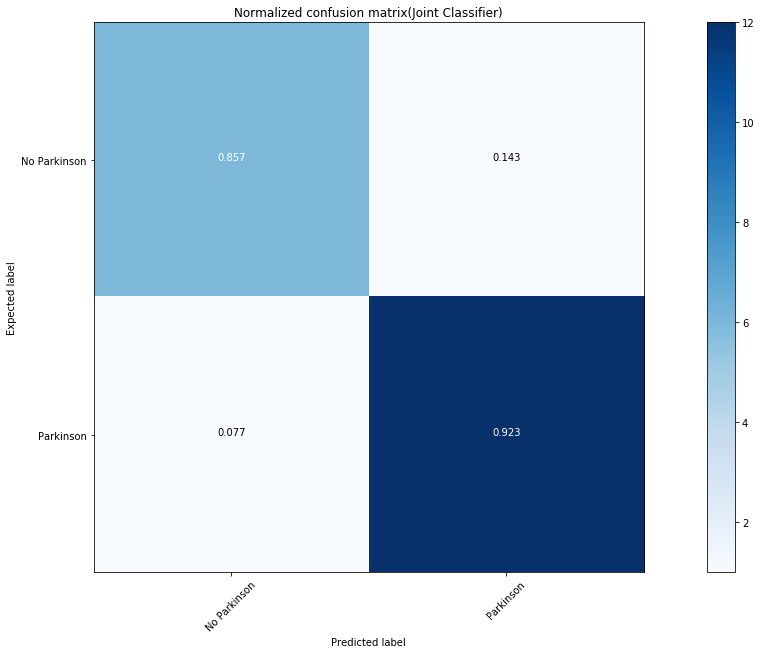

In [187]:
clf =  joint()

%time clf.fit(X_train, y_train)
#print "Training Error: ", 1 - clf.score(X_train, y_train)

clf.report(X_validation, y_validation)
  

## Test


######### REPORT #########

Score:  0.9473684210526315
Total samples:  19

Data:

    SVM  MLP  Random Forest  Naive Bayes  Joint Model  Expected
0     1    1              1            1            1         1
1     0    0              0            0            0         0
2     1    1              0            1            0         0
3     1    1              1            1            1         0
4     0    0              0            0            0         0
5     0    0              1            0            1         1
6     0    0              0            0            0         0
7     0    0              0            0            0         0
8     0    0              0            0            0         0
9     0    0              0            0            0         0
10    0    0              0            0            0         0
11    1    1              1            1            1         1
12    0    0              0            0            0         0
13    0    0         

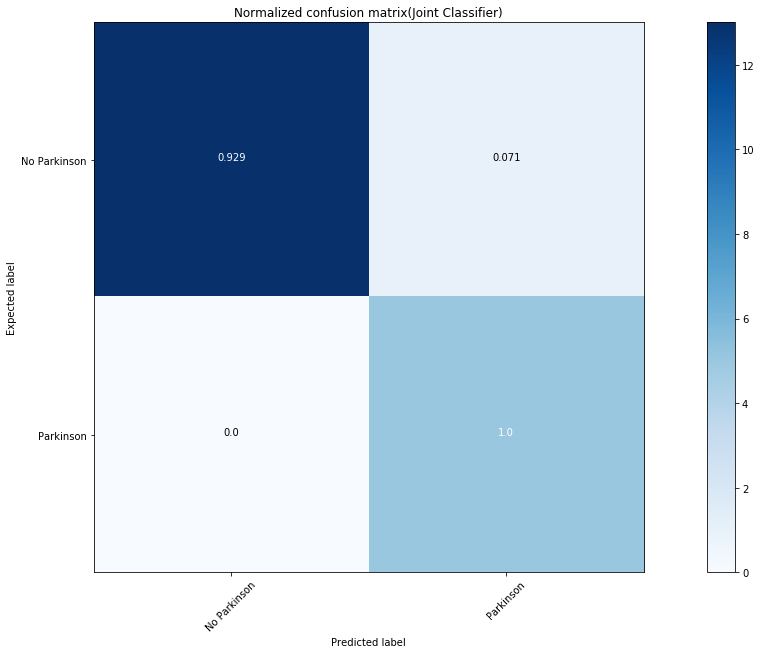

In [188]:
clf.report(X_test, y_test)

## Simplified joint model

In [189]:
class sjoint:
    def __init__(self, function="SVM"): #could be SVM RandomForest,
        self.svc = SVC(C=2., kernel="rbf", degree=3, gamma="auto", 
            coef0=0.0, shrinking=True, probability=False, 
            tol=1e-5, cache_size=200, class_weight=None, 
            verbose=False, max_iter=-1, decision_function_shape="ovr", 
            random_state=None)  
        

        
        self.rForest  = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None, 
            min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features="auto", 
            max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, bootstrap=True, oob_score=False,
            n_jobs=1, random_state=None, verbose=0, warm_start=False, 
            class_weight=None)
       
        
        #defining the final classifier     
        if function=="SVM":
            self.clf = copy.copy(self.svc)
        elif function=="RandomForest":
            self.clf = copy.copy(self.rForest)
        else:
            print "Classifier not defined!!"
        self.report_data = None
    
    def fit(self, X, y):
        #pre train
        self.svc.fit(X, y)
        self.rForest.fit(X, y)
        
        #jointing data
        X_n = np.vstack(( self.svc.predict(X), self.rForest.predict(X)  )).T
        #training the final model
        self.clf.fit(X_n, y)
        
        
    def predict(self, X):
        X_n = np.vstack(( self.svc.predict(X), self.rForest.predict(X) )).T
        #the final model
        
        result = self.clf.predict(X_n)
        
        self.report_data = pd.DataFrame(np.hstack((X_n, result.reshape(-1,1))), columns=
            ["SVM", "Random Forest", "Joint Model"], dtype=np.int64)
        return result
        
    def score(self, X, y):
        X_n = np.vstack(( self.svc.predict(X), self.rForest.predict(X))).T
        return self.clf.score(X_n, y)
    
    
    def _plot_confusion_matrix(self, y_test, y_pred): 
        cnf_matrix = confusion_matrix(y_test, y_pred)
        classes = np.array(["No Parkinson", "Parkinson"])
        plt.clf()
        plt.close("all")
        plt.figure(figsize = (18,9))
        plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Normalized confusion matrix(Simplified Joint Classifier)')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        #normalized
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        thresh = cnf_matrix.max() / 2.
        for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, round(cnf_matrix[i, j], 3),
                horizontalalignment="center",
                color="white" if cnf_matrix[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Expected label')
        plt.xlabel('Predicted label')
        plt.show()

    
    
    
    
    def report(self, X, y):
        
        print "\n######### REPORT #########\n"
        print "Score: ", self.score(X, y)
        print "Total samples: ", y.shape[0]
        p  = self.predict(X)
        self.report_data.loc[:, "Expected"] = y.astype(np.int64)
        
        print "\nData:\n\n", self.report_data, "\n"
       
        self._plot_confusion_matrix(y, p)
        
    
    
    
def plot_confusion_matrix(y_test, y_pred): 
    cnf_matrix = confusion_matrix(y_test, y_pred)
    classes = np.array(["No Parkinson", "Parkinson"])
    plt.clf()
    plt.close("all")
    plt.figure(figsize = (18,9))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix(Joint Classifier)')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #normalized
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, round(cnf_matrix[i, j], 3),
            horizontalalignment="center",
            color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()

CPU times: user 66.4 ms, sys: 1.91 ms, total: 68.3 ms
Wall time: 67.9 ms

######### REPORT #########

Score:  0.95
Total samples:  20

Data:

    SVM  Random Forest  Joint Model  Expected
0     1              1            1         1
1     1              1            1         1
2     0              0            0         0
3     1              1            1         1
4     1              1            1         1
5     1              1            1         1
6     1              1            1         1
7     0              0            0         0
8     1              1            1         1
9     0              0            0         0
10    0              0            0         0
11    0              1            1         1
12    1              0            0         1
13    1              0            0         0
14    1              0            0         0
15    1              1            1         1
16    1              1            1         1
17    0              0        

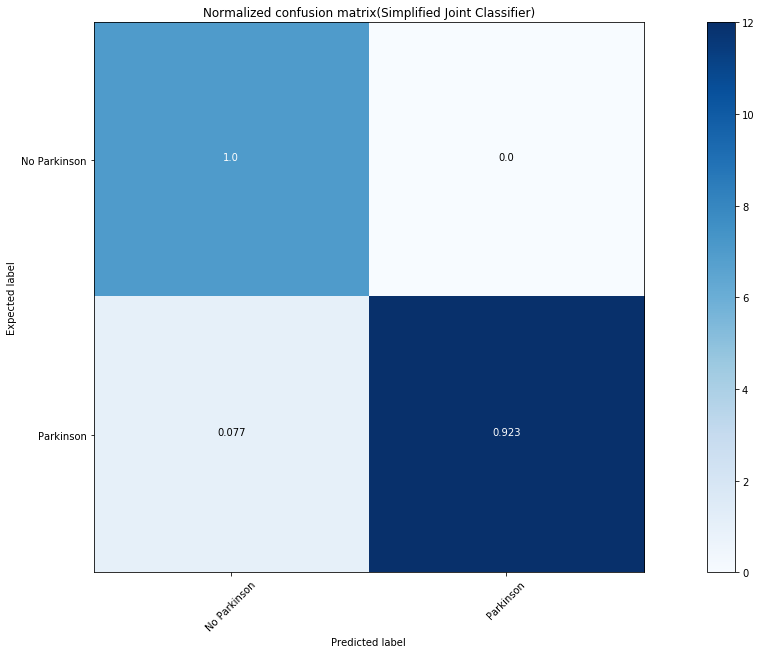

In [190]:
clfs =  sjoint()

%time clfs.fit(X_train, y_train)
#print "Training Error: ", 1 - clf.score(X_train, y_train)

clfs.report(X_validation, y_validation)

## Test


######### REPORT #########

Score:  0.9473684210526315
Total samples:  19

Data:

    SVM  Random Forest  Joint Model  Expected
0     1              1            1         1
1     0              0            0         0
2     1              0            0         0
3     1              1            1         0
4     0              0            0         0
5     0              1            1         1
6     0              0            0         0
7     0              0            0         0
8     0              0            0         0
9     0              0            0         0
10    0              0            0         0
11    1              1            1         1
12    0              0            0         0
13    0              0            0         0
14    1              0            0         0
15    0              0            0         0
16    0              1            1         1
17    1              1            1         1
18    0              0            0        

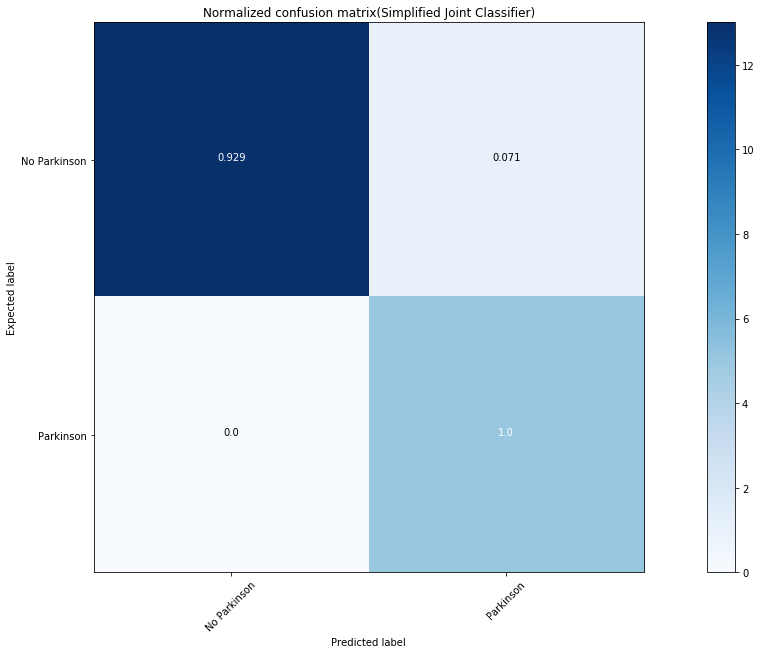

CPU times: user 434 ms, sys: 51.1 ms, total: 485 ms
Wall time: 287 ms


In [191]:
%time clfs.report(X_test, y_test)